# Import the libraries

In [1]:
import numpy as np
from bs4 import BeautifulSoup
import requests
import collections
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /home/agheal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Scrape the website

In [2]:
# url to scrape
url = 'http://insightdatascience.com/fellows'
req = requests.get(url)
# Create a beautifulsoup object from html content
beautiful_soup = BeautifulSoup(req.text,"html.parser")

# I am going to extract the project titles for each Insight fellow and do some text mining on them. The steps are as follows:

## Step 1- Data Assemble

In [3]:
# First, assemble the data using lists on the website
fellows_list = beautiful_soup.findAll('div', class_="fellows_list w-dyn-list")
# The project titles will be added to this list
projects = []
# This loop extracts the project title for each fellow and appends it to the projects list above
for item in fellows_list:
    fellows = item.findAll('div', class_="w-clearfix w-dyn-items w-row")
    fellows = fellows[0].findAll('div', class_='fellow_item w-dyn-item w-col w-col-2')
    for f in fellows[:]:
        pj = f.find('div', class_="tooltip_project").text
        # Convert the prject title to all lowercase
        pj = pj.lower()
        projects.append(pj)

## Step 2- Data Processing

In [4]:
# Define the stop words you want to filter
stop_words = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 
              'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 
              'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 
              'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we','these', 'your', 'his', 'through',
              'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 
              'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 
              'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 
              'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 
              'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 
              'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than',':','.',',',
             '!','?','etc','...','$','\'','â',"'s",'(',')','&',"'ll"}
 
# Tokenize your list of strings
word_tokens = [word_tokenize(p) for p in projects]


# Flatten the list of all strings and put them in one list called all_words
def flatten_string_list(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten_string_list(i))
        else: rt.append(i)
    return rt
all_words = flatten_string_list(word_tokens)


# Remove the stop words from all_words
filtered_list = []
for w in all_words:
    if w not in stop_words:
        filtered_list.append(w)


# 3- Data visualization and word cloud

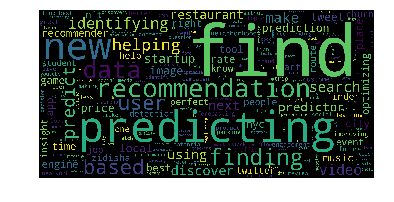

In [36]:
# To plot the most common words, we can use the built in module in Python. The WordCloud takes regular expression
# as argument, so we need to join all the words in our filtered_list into one single argument.

regexp=r"\w[\w' ]+"
cloud = WordCloud(relative_scaling = 1.0,regexp=r"\w[\w' ]+",width=6000, height=3000).generate("+".join(filtered_list))
plt.imshow(cloud)
plt.axis("off")
#plt.show()
plt.savefig('cloud2.png', dpi = 300)